# Introduction

This notebook is to explore the data from the ICNALE.
There are two main data sources:
- transcripts_with_relevance_annotated.xlsx
- SD_PTJ_Words_byCountryIDCefr.xlsx and SD_SMK_Words_byCountryIDCefr.xlsx

### Columns in transcripts_with_relevance_annotated.xlsx
|Column| Description|
|---|---|
|Code|SD_CountryCode_ParticipantID, e.g. SD_CHN_001. Extracted from official ICNALE_Survey_202507.xlsx file|
|Country Code| Extracted from the Code|
|ID| Participants ID extracted from the Code|
|Sex|Extracted from official ICNALE_Survey_202507.xlsx file|
|CEFR Level|Extracted from official ICNALE_Survey_202507.xlsx file|
|PTJ_PIC_xx|Transcript mapped from respective participants SD PTJ_PIC Task|
|SMK_PIC_xx|Transcript mapped from respective participants SD SMK_PIC Task|
|CEFR Checker| Participant's CEFR level reflected in the Transcript file name, as a checker agains the CEFR Level in the official survey xlsx file|
|PTJ_PIC_xx_words| Number of words from PTJ_PIC_xx transcript|
|PTJ_PIC_xx_sentences|Number of sentences from PTJ_PIC_xx transcript|
|SMK_PIC_xx_words|Number of words from SMK_PIC_xx transcript|
|SMK_PIC_xx_sentences|Number of sentences from SMK_PIC_xx transcript|
|PTJ_Relevant (OpenAI 4o-mini)|OpenAI's assessment whether the transcript is "spot on" or "off topic"|
|SMK_Relevant (OpenAI 4o-mini)|Ditto|
|PTJ_Relevant (Manual Annotation)|HJ's assessment (for OpenAI's "off topic" transcripts only) whether the transcript is really "off topic" or relevant. The rest of the OpenAI's "spot on" are converted to "relevant" without manual assessment|
|SMK_Relevant (Manual Annotation)|Ditto|
|Teacher/Student|Participants from ENS country code are labelled as T; The rest are S|

### Columns in SD_PTJ/SMK_Words_byCountryIDCefr.xlsx
These 2 files carry the respective Spoken Dialogue picture discription task on part-time job and smoking topics.

|Column| Description|
|---|---|
|uid|CountryCode_ParticipantID_CEFRChecker|
|Country|Extracted from uid|
|ID|Ditto|
|CEFR|Ditto|
|stem|Individual word appeared in the respective transcript with stemming|
|lemma|Individual word appeared in the respective transcript with lemmatization|

# Spoken Dialogue Participants Information


In [1]:
import nltk

In [2]:
import pandas as pd

In [3]:
participants = pd.read_excel("transcripts_with_relevance_annotated.xlsx")
participants.head()


Code Country Code  ID Sex CEFR Level  \
0  SD_CHN_001          CHN   1   M       B1_2   
1  SD_CHN_002          CHN   2   M       B1_1   
2  SD_CHN_003          CHN   3   F        B2+   
3  SD_CHN_004          CHN   4   M       B1_2   
4  SD_CHN_005          CHN   5   F       B1_2   

                                          PTJ_PIC_xx  \
0  ﻿Uh.  A few weeks ago, uh, this boy want to sw...   
1  ﻿\nA few weeks ago, a man who was swimming at ...   
2  ﻿A few weeks ago, a man wanted swimming in the...   
3  ﻿\nA few weeks ago, man is reading - is wantin...   
4  ﻿\nA few weeks ago, a boy want to travel to th...   

                                          SMK_PIC_xx CEFR Checker  \
0  ﻿\nYes.  ... uh, a few weeks - a few weeks ago...         B1_2   
1  ﻿A few weeks ago, a boy with his mom was playi...         B1_1   
2  ﻿\nOh, thank you.  A few weeks later, a girl, ...         B2_0   
3  ﻿\nThank you very much.  And a few weeks ago, ...         B1_2   
4  ﻿\nOkay.  Um, a few - a few weeks - weeks ago,...         B1_2   

   PTJ_PIC_xx_words  PTJ_PIC_xx_sentences  SMK_PIC_xx_words  \
0                87                     8               121   
1               193                     4               102   
2               141                    14               115   
3               149                     5               123   
4                82                     3               134   

   SMK_PIC_xx_sentences PTJ_Relevant (OpenAI 4o-mini)  \
0                     7                       spot on   
1                     5                     off topic   
2                     8                     off topic   
3                     5                     off topic   
4                     2                       spot on   

  SMK_Relevant (OpenAI 4o-mini) PTJ_Relevant (Manual Annotation)  \
0                       spot on                         relevant   
1                     off topic                         relevant   
2                       spot on                         relevant   
3                     off topic                         relevant   
4                       spot on                         relevant   

  SMK_Relevant (Manual Annotation) Teacher/Student  
0                         relevant               S  
1                         relevant               S  
2                         relevant               S  
3                         relevant               S  
4                         relevant               S

### Participant Distribution Overview

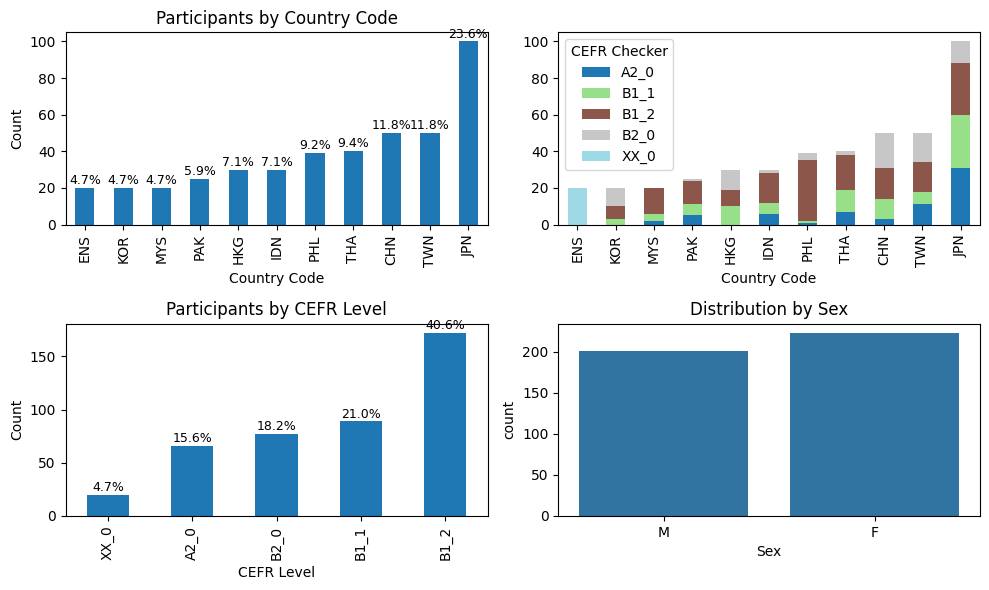

In [19]:
import matplotlib.pyplot as plt
import seaborn as sn

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Pick the specific axis
ax = axes[0, 0]
data = participants["Country Code"]

def count_distribution_bar(data, ax, title_label=None, x_label=None, y_label=None):
    # Count "Yes"/"No" responses
    counts = data.value_counts().sort_values()
    percentages = counts / counts.sum() * 100

    counts.plot(
        kind='bar',
        stacked=True,
        # figsize=(10, 6),
        colormap='tab20',
        ax=ax
    )

    for i, (count, pct) in enumerate(zip(counts, percentages)):
        ax.text(
            i, count + 0.5,                      # position: (x, y)
            f"{pct:.1f}%",                       # format label
            ha='center', va='bottom', fontsize=9 # alignment & font
        )

    ax.set_title(title_label)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

count_distribution_bar(participants["Country Code"],axes[0, 0], 'Participants by Country Code', 'Country Code', 'Count')
count_distribution_bar(participants["CEFR Checker"],axes[1, 0],'Participants by CEFR Level', 'CEFR Level', 'Count')

country_cefr = participants.groupby(['Country Code', 'CEFR Checker']).size().unstack(fill_value=0)
country_cefr.loc[country_cefr.sum(axis=1).sort_values().index].plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20', ax=axes[0,1])

sn.countplot(data=participants, x='Sex', ax=axes[1,1])
axes[1,1].set_title('Distribution by Sex')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# --- STEP 1: Randomly select 3 participants per Country + CEFR ---
sample_all = (
    participants.groupby(["Country Code", "CEFR Checker"], group_keys=False)
      .apply(lambda x: x.sample(n=min(3, len(x)), random_state=42))
)

# Mark selections
participants["PTJSMK_Select"] = participants["Code"].isin(sample_all["Code"]).map({True: "Y", False: "N"})

# --- STEP 2: Randomly select 3 PTJ "relevant" participants per Country + CEFR ---
relevant_df = participants[participants["PTJ_Relevant (Manual Annotation)"].str.lower() == "relevant"]

sample_relevant = (
    relevant_df.groupby(["Country Code", "CEFR Checker"], group_keys=False)
               .apply(lambda x: x.sample(n=min(3, len(x)), random_state=42))
)

# Mark selections
participants["PTJ_Relevant_Select"] = participants["Code"].isin(sample_relevant["Code"]).map({True: "Y", False: "N"})

# Repeat for SMK

# --- STEP 3: Randomly select 3 SMK "relevant" participants per Country + CEFR ---
relevant_df = participants[participants["SMK_Relevant (Manual Annotation)"].str.lower() == "relevant"]

sample_relevant = (
    relevant_df.groupby(["Country Code", "CEFR Checker"], group_keys=False)
               .apply(lambda x: x.sample(n=min(3, len(x)), random_state=42))
)

# Mark selections
participants["SMK_Relevant_Select"] = participants["Code"].isin(sample_relevant["Code"]).map({True: "Y", False: "N"})


/var/folders/0c/zjqjwgs566x9jwtsk1g6k3940000gn/T/ipykernel_26127/3969868275.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min(3, len(x)), random_state=42))
/var/folders/0c/zjqjwgs566x9jwtsk1g6k3940000gn/T/ipykernel_26127/3969868275.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min(3, len(x)), random_state=42))
/var/folders/0c/zjqjwgs566x9jwtsk1g6k39

In [67]:
print(f"Total number of participants sampled regardless of relevancy: {participants[participants["PTJSMK_Select"]=='Y'].shape[0]}")
print(f"Total number of participants sampled from relevant PTJ transcripts: {participants[participants["PTJ_Relevant_Select"]=='Y'].shape[0]}")
print(f"Total number of participants sampled from relevant SMK transcripts: {participants[participants["SMK_Relevant_Select"]=='Y'].shape[0]}")

Total number of participants sampled regardless of relevancy: 105
Total number of participants sampled from relevant PTJ transcripts: 93
Total number of participants sampled from relevant SMK transcripts: 105


## Distribution of Sampled Participants

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1️⃣ Define color palette for CEFR ---
cefr_levels = participants["CEFR Checker"].unique()
palette = sns.color_palette("Paired", n_colors=len(cefr_levels))
color_map = dict(zip(sorted(cefr_levels), palette))

# --- 2️⃣ Create figure with 3x2 subplots ---
fig, axes = plt.subplots(3, 2, figsize=(14, 16))

# --- 3️⃣ Define the three selection conditions (customize as you need) ---
conditions = [
    ("PTJSMK_Select", "Participants sampled regardless of relevancy"),
    ("PTJ_Relevant_Select", "Participants sampled from relevant PTJ transcripts"),
    ("SMK_Relevant_Select", "Participants sampled from relevant SMK transcripts"),
]

# --- 4️⃣ Loop through each condition and fill one row ---
for i, (col_name, title_text) in enumerate(conditions):
    selected = participants[participants[col_name].str.lower() == "y"]
    
    # Counts by country + CEFR
    country_cefr_select = (
        selected.groupby(["Country Code", "CEFR Checker"])
                .size()
                .unstack(fill_value=0)
    )
    sort_order = country_cefr_select.sum(axis=1).sort_values().index
    country_cefr_select = country_cefr_select.loc[sort_order]
    
    # Counts by CEFR
    cefr_counts = selected["CEFR Checker"].value_counts().reindex(country_cefr_select.columns)
    
    # --- Left subplot: stacked bar ---
    country_cefr_select.plot(
        kind="bar",
        stacked=True,
        color=[color_map[c] for c in country_cefr_select.columns],
        ax=axes[i, 0]
    )
    axes[i, 0].set_title(f"{title_text} by Country and CEFR")
    axes[i, 0].set_xlabel("Country Code")
    axes[i, 0].set_ylabel("Count")
    axes[i, 0].legend(title="CEFR Level", bbox_to_anchor=(1.05, 1), loc="upper left")
    
    # --- Right subplot: CEFR totals ---
    axes[i, 1].bar(
        cefr_counts.index,
        cefr_counts.values,
        color=[color_map[c] for c in cefr_counts.index]
    )
    axes[i, 1].set_title(f"{title_text} by CEFR Level")
    axes[i, 1].set_xlabel("CEFR Level")
    axes[i, 1].set_ylabel("Count")
    axes[i, 1].set_ylim(0, 32)

plt.tight_layout()
plt.show()


In [ ]:
participants.to_excel('transcripts_with_relevance_annotated_selected.xlsx', index=False)

# Spoken Dialogue Word and Sentence Counts wrt CEFR Levels

In [75]:
df = participants[['Country Code','CEFR Checker','PTJ_PIC_xx_words','PTJ_PIC_xx_sentences','SMK_PIC_xx_words','SMK_PIC_xx_sentences']]
df.head()

Country Code CEFR Checker  PTJ_PIC_xx_words  PTJ_PIC_xx_sentences  \
0          CHN         B1_2                87                     8   
1          CHN         B1_1               193                     4   
2          CHN         B2_0               141                    14   
3          CHN         B1_2               149                     5   
4          CHN         B1_2                82                     3   

   SMK_PIC_xx_words  SMK_PIC_xx_sentences  
0               121                     7  
1               102                     5  
2               115                     8  
3               123                     5  
4               134                     2

### Comparing word count and sentence count by country and CEFR levels

The number of words and sentences doesn't vary a lot by CEFR levels. There are some patterns but not consistently higher CEFR level leading to higher or lower counts.

On the other hand, participants in certain regions tend to speak more than the others, such as IND.

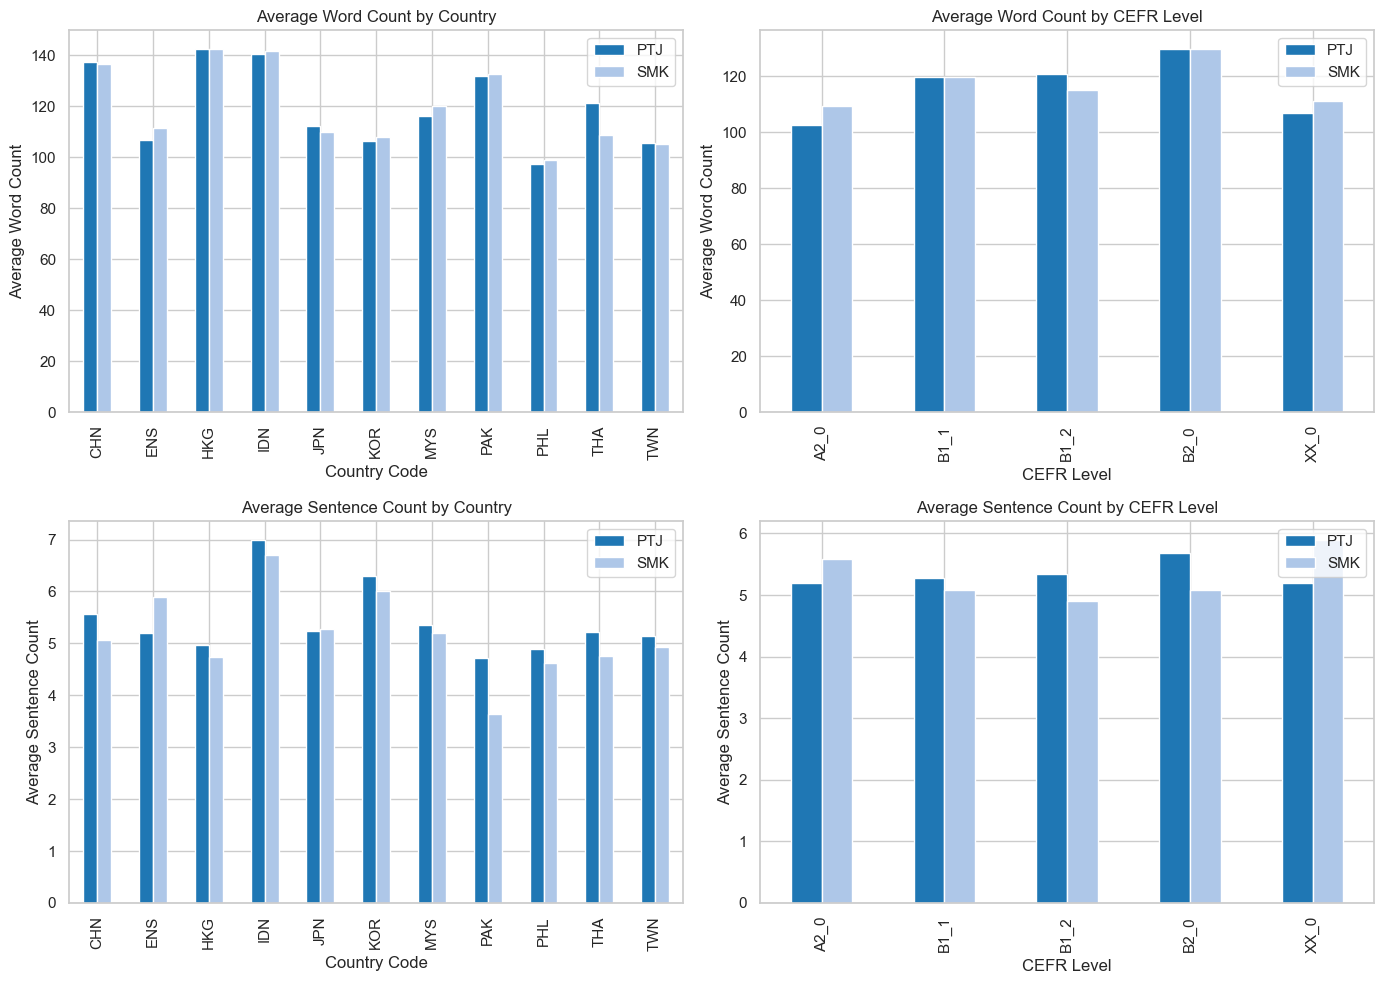

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- 1️⃣ Create aggregates for Country and CEFR ---
# (mean or sum depending on your interpretation — here we use mean per group)
country_stats = (
    df.groupby("Country Code")[["PTJ_PIC_xx_words", "SMK_PIC_xx_words",
                                "PTJ_PIC_xx_sentences", "SMK_PIC_xx_sentences"]]
    .mean()
    .reset_index()
)

cefr_stats = (
    df.groupby("CEFR Checker")[["PTJ_PIC_xx_words", "SMK_PIC_xx_words",
                                "PTJ_PIC_xx_sentences", "SMK_PIC_xx_sentences"]]
    .mean()
    .reset_index()
)

# --- 2️⃣ Create figure with 2×2 subplots ---
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# --- 3️⃣ Define color palette ---
colors = sns.color_palette("tab20", n_colors=2)

# --- 4️⃣ Plot 1: Word counts by Country ---
country_stats.plot(
    kind="bar",
    x="Country Code",
    y=["PTJ_PIC_xx_words", "SMK_PIC_xx_words"],
    ax=axes[0, 0],
    color=colors
)
axes[0, 0].set_title("Average Word Count by Country")
axes[0, 0].set_xlabel("Country Code")
axes[0, 0].set_ylabel("Average Word Count")
axes[0, 0].legend(["PTJ", "SMK"])

# --- 5️⃣ Plot 2: Word counts by CEFR ---
cefr_stats.plot(
    kind="bar",
    x="CEFR Checker",
    y=["PTJ_PIC_xx_words", "SMK_PIC_xx_words"],
    ax=axes[0, 1],
    color=colors
)
axes[0, 1].set_title("Average Word Count by CEFR Level")
axes[0, 1].set_xlabel("CEFR Level")
axes[0, 1].set_ylabel("Average Word Count")
axes[0, 1].legend(["PTJ", "SMK"])

# --- 6️⃣ Plot 3: Sentence counts by Country ---
country_stats.plot(
    kind="bar",
    x="Country Code",
    y=["PTJ_PIC_xx_sentences", "SMK_PIC_xx_sentences"],
    ax=axes[1, 0],
    color=colors
)
axes[1, 0].set_title("Average Sentence Count by Country")
axes[1, 0].set_xlabel("Country Code")
axes[1, 0].set_ylabel("Average Sentence Count")
axes[1, 0].legend(["PTJ", "SMK"])

# --- 7️⃣ Plot 4: Sentence counts by CEFR ---
cefr_stats.plot(
    kind="bar",
    x="CEFR Checker",
    y=["PTJ_PIC_xx_sentences", "SMK_PIC_xx_sentences"],
    ax=axes[1, 1],
    color=colors
)
axes[1, 1].set_title("Average Sentence Count by CEFR Level")
axes[1, 1].set_xlabel("CEFR Level")
axes[1, 1].set_ylabel("Average Sentence Count")
axes[1, 1].legend(["PTJ", "SMK"])

plt.tight_layout()
plt.show()


### Word count and sentence count distribution from individual participants

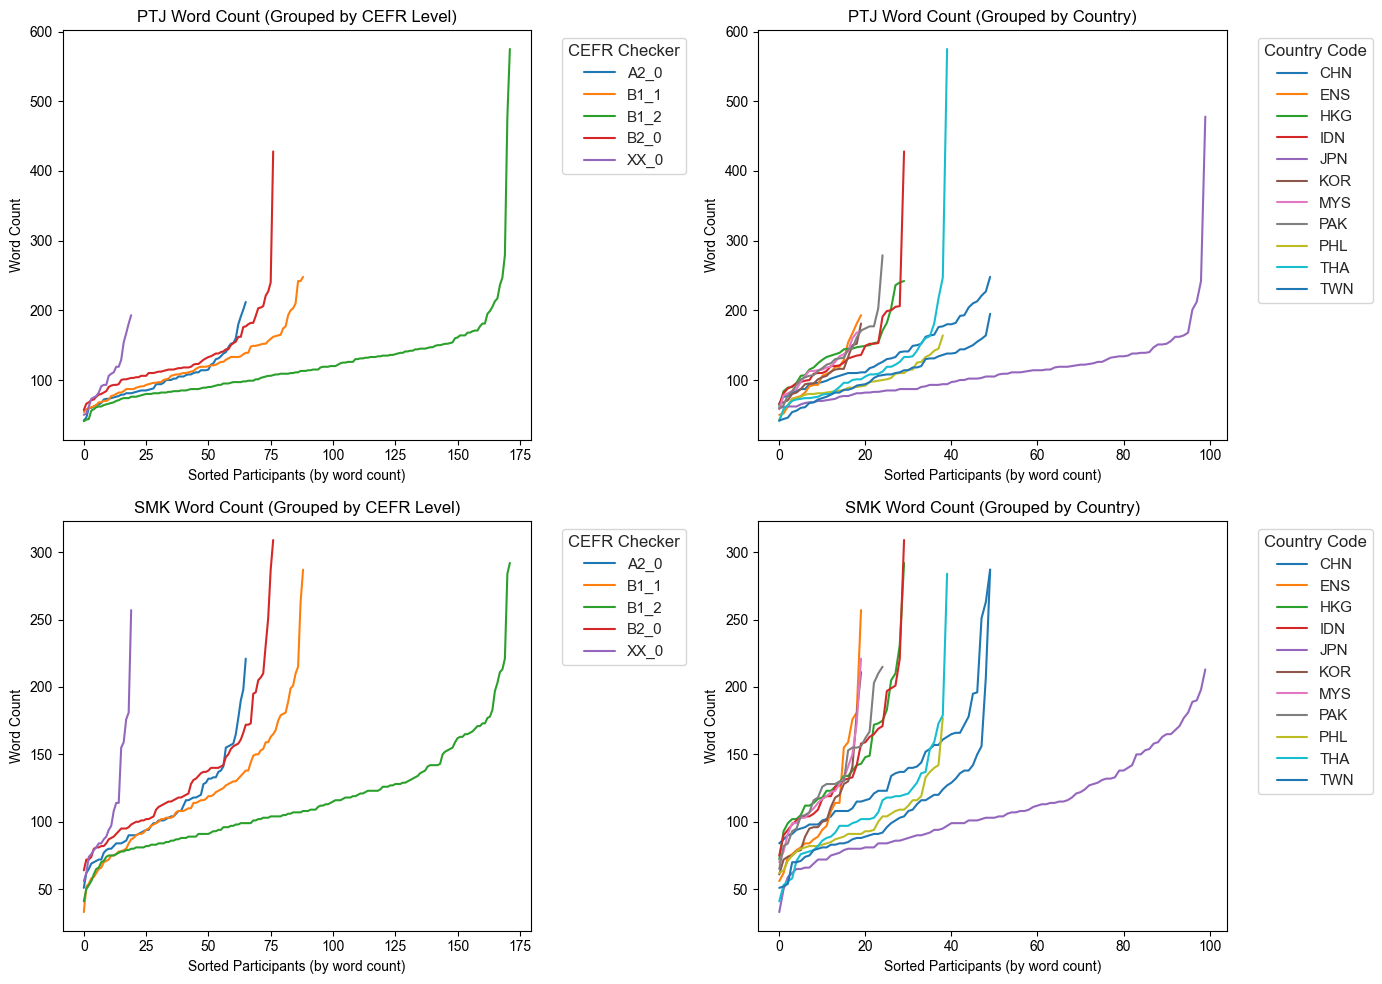

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1️⃣ Setup ---
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.set_theme(style="whitegrid")

# --- 2️⃣ Define plotting helper function ---
def plot_sorted_lines(ax, df, group_col, value_col, title):
    """
    ax: subplot axis
    df: DataFrame
    group_col: 'CEFR Checker' or 'Country Code'
    value_col: 'PTJ_PIC_xx_words' or 'SMK_PIC_xx_words'
    """
    for name, group in df.groupby(group_col):
        sorted_vals = group[value_col].sort_values().reset_index(drop=True)
        ax.plot(sorted_vals, label=name)
    
    ax.set_title(title)
    ax.set_xlabel("Sorted Participants (by word count)")
    ax.set_ylabel("Word Count")
    ax.legend(title=group_col, bbox_to_anchor=(1.05, 1), loc="upper left")

# --- 3️⃣ Plot PTJ word counts ---
plot_sorted_lines(
    axes[0, 0], df, "CEFR Checker", "PTJ_PIC_xx_words",
    "PTJ Word Count (Grouped by CEFR Level)"
)

plot_sorted_lines(
    axes[0, 1], df, "Country Code", "PTJ_PIC_xx_words",
    "PTJ Word Count (Grouped by Country)"
)

# --- 4️⃣ Plot SMK word counts ---
plot_sorted_lines(
    axes[1, 0], df, "CEFR Checker", "SMK_PIC_xx_words",
    "SMK Word Count (Grouped by CEFR Level)"
)

plot_sorted_lines(
    axes[1, 1], df, "Country Code", "SMK_PIC_xx_words",
    "SMK Word Count (Grouped by Country)"
)

plt.tight_layout()
plt.show()


### Word count and sentence count distribution from normalised percentage of participants

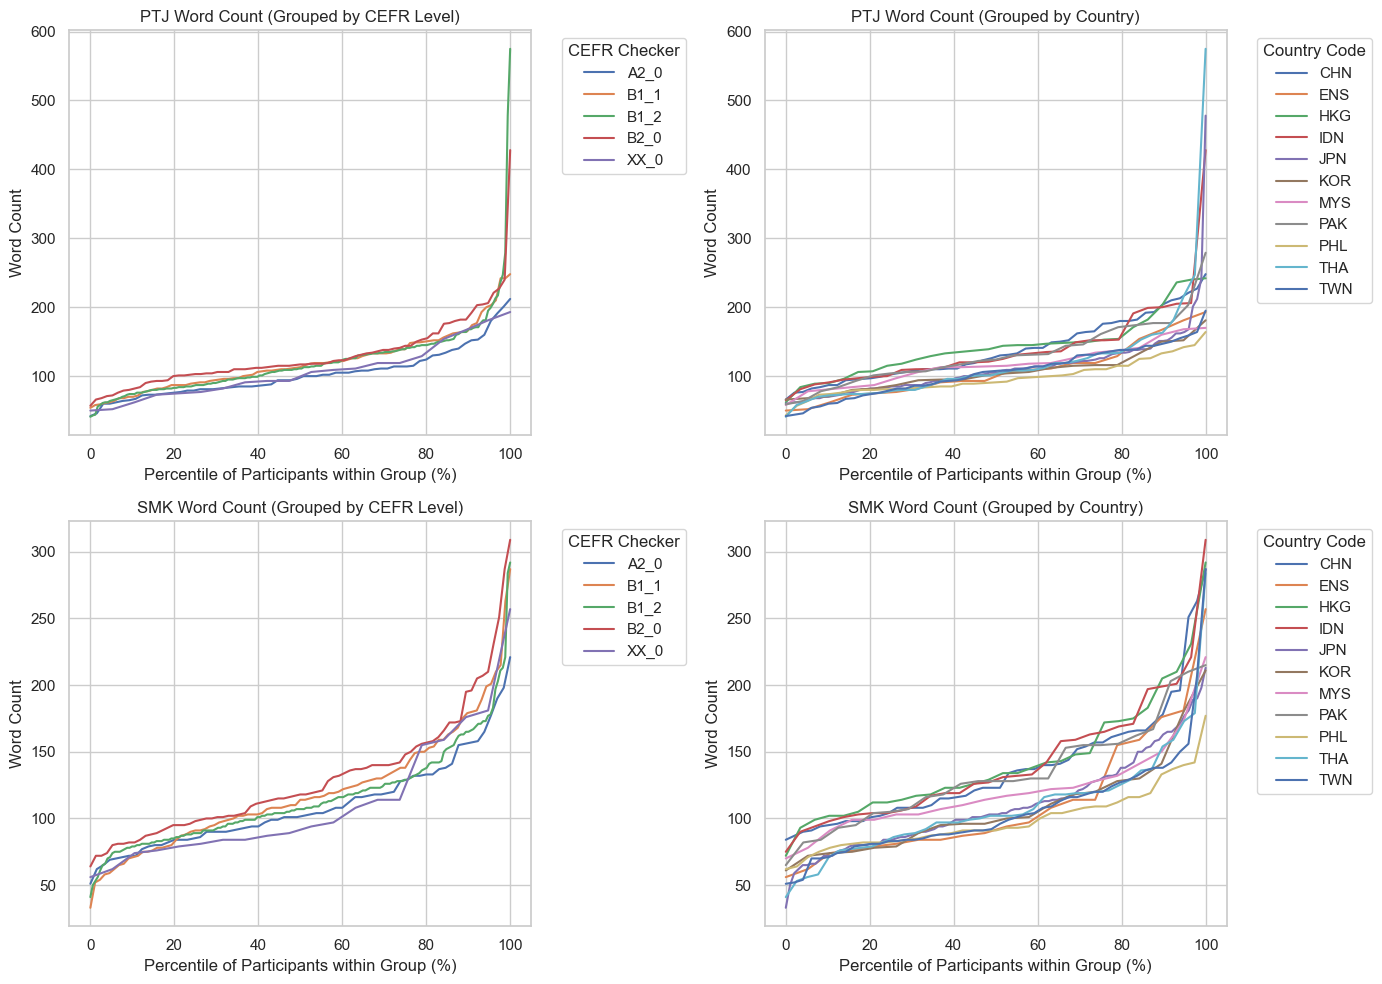

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1️⃣ Setup ---
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.set_theme(style="whitegrid")

# --- 2️⃣ Define plotting helper function ---
def plot_sorted_lines(ax, df, group_col, value_col, title):
    """
    ax: subplot axis
    df: DataFrame
    group_col: 'CEFR Checker' or 'Country Code'
    value_col: 'PTJ_PIC_xx_words' or 'SMK_PIC_xx_words'
    """
    for name, group in df.groupby(group_col):
        sorted_vals = group[value_col].sort_values().reset_index(drop=True)
        n = len(sorted_vals)
        x_percent = np.linspace(0, 100, n)  # normalized x-axis (0–100%)
        ax.plot(x_percent, sorted_vals, label=name)
    
    ax.set_title(title)
    ax.set_xlabel("Percentile of Participants within Group (%)")
    ax.set_ylabel("Word Count")
    ax.legend(title=group_col, bbox_to_anchor=(1.05, 1), loc="upper left")

# --- 3️⃣ Plot PTJ word counts ---
plot_sorted_lines(
    axes[0, 0], df, "CEFR Checker", "PTJ_PIC_xx_words",
    "PTJ Word Count (Grouped by CEFR Level)"
)

plot_sorted_lines(
    axes[0, 1], df, "Country Code", "PTJ_PIC_xx_words",
    "PTJ Word Count (Grouped by Country)"
)

# --- 4️⃣ Plot SMK word counts ---
plot_sorted_lines(
    axes[1, 0], df, "CEFR Checker", "SMK_PIC_xx_words",
    "SMK Word Count (Grouped by CEFR Level)"
)

plot_sorted_lines(
    axes[1, 1], df, "Country Code", "SMK_PIC_xx_words",
    "SMK Word Count (Grouped by Country)"
)

plt.tight_layout()
plt.show()


# Word Cloud by Topic - Part-time Job and Smoking

In [87]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

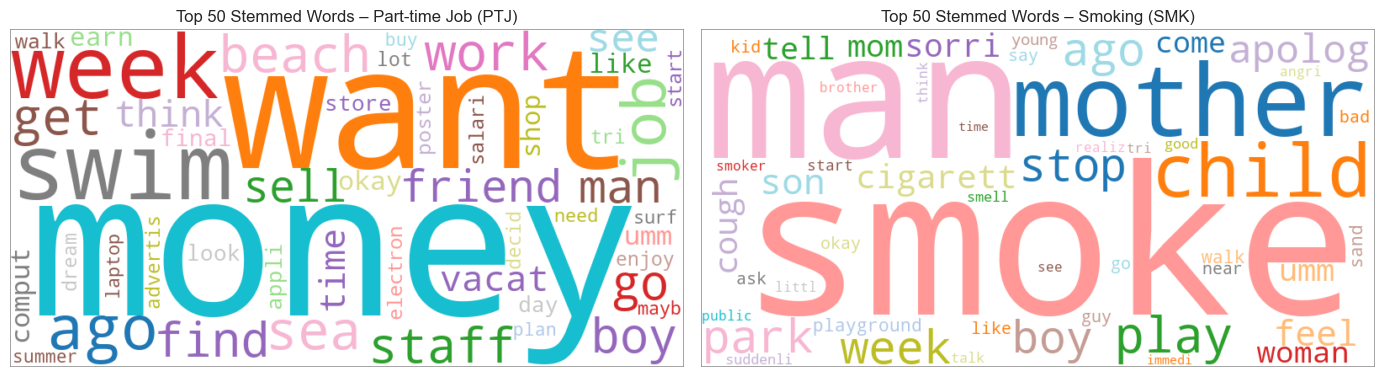

In [92]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# --- Load data ---
ptj = pd.read_excel("SD_PTJ_Words_byCountryIDCefr.xlsx")
smk = pd.read_excel("SD_SMK_Words_byCountryIDCefr.xlsx")

# --- Compute top 50 frequencies ---
ptj_top50 = ptj["stem"].value_counts().head(50)
smk_top50 = smk["stem"].value_counts().head(50)

# --- Create word clouds ---
ptj_wc = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="tab20",
    max_words=50
).generate_from_frequencies(ptj_top50.to_dict())

smk_wc = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="tab20",
    max_words=50
).generate_from_frequencies(smk_top50.to_dict())

# --- Plot side by side with borders ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for ax, wc, title in zip(
    axes,
    [ptj_wc, smk_wc],
    ["Top 50 Stemmed Words – Part-time Job (PTJ)",
     "Top 50 Stemmed Words – Smoking (SMK)"]
):
    ax.imshow(wc, interpolation="bilinear")
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    
    # ✅ Add border
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color("grey")
        spine.set_linewidth(0.5)

plt.tight_layout()
plt.show()
